<a href="https://colab.research.google.com/github/sarah-ingrid/DataGirls_attrition-predictio/blob/main/ProjetoDATAGIRLS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Limpeza e Preparação dos Dados + Análise Exploratória (EDA)

In [130]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [131]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [132]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [133]:
df.shape

(1470, 35)

In [134]:
faltantes = pd.DataFrame({'colunas':df.columns,
                      'tipo':df.dtypes,
                      'Qtde valores NaN':df.isna().sum(),
                      'valores únicos por feature':df.nunique()})
faltantes = faltantes.reset_index()
faltantes

,index,colunas,tipo,Qtde valores NaN,valores únicos por feature
0,Age,Age,int64,0,43
1,Attrition,Attrition,object,0,2
2,BusinessTravel,BusinessTravel,object,0,3
3,DailyRate,DailyRate,int64,0,886
4,Department,Department,object,0,3
5,DistanceFromHome,DistanceFromHome,int64,0,29
6,Education,Education,int64,0,5
7,EducationField,EducationField,object,0,6
8,EmployeeCount,EmployeeCount,int64,0,1
9,EmployeeNumber,EmployeeNumber,int64,0,1470


In [135]:
print(df[['Gender',  'JobRole', 'MaritalStatus', 'Over18', 'OverTime']])

      Gender                    JobRole MaritalStatus Over18 OverTime
0     Female            Sales Executive        Single      Y      Yes
1       Male         Research Scientist       Married      Y       No
2       Male      Laboratory Technician        Single      Y      Yes
3     Female         Research Scientist       Married      Y      Yes
4       Male      Laboratory Technician       Married      Y       No
...      ...                        ...           ...    ...      ...
1465    Male      Laboratory Technician       Married      Y       No
1466    Male  Healthcare Representative       Married      Y       No
1467    Male     Manufacturing Director       Married      Y      Yes
1468    Male            Sales Executive       Married      Y       No
1469    Male      Laboratory Technician       Married      Y       No

[1470 rows x 5 columns]


In [136]:
(df == '').sum()

,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


In [137]:
func_maior18 = df[df['Over18'] == 'N']

func_maior18

# TODOS os funcionarios tem +18 anos

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


In [138]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [139]:
df[df.duplicated()] # nenhuma 100% igual

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


In [140]:

df[['JobInvolvement', 'JobSatisfaction', 'PerformanceRating']].max() # para ver qual a nota máxima que podem dar

,0
JobInvolvement,4
JobSatisfaction,4
PerformanceRating,4


<Axes: xlabel='JobSatisfaction', ylabel='Count'>

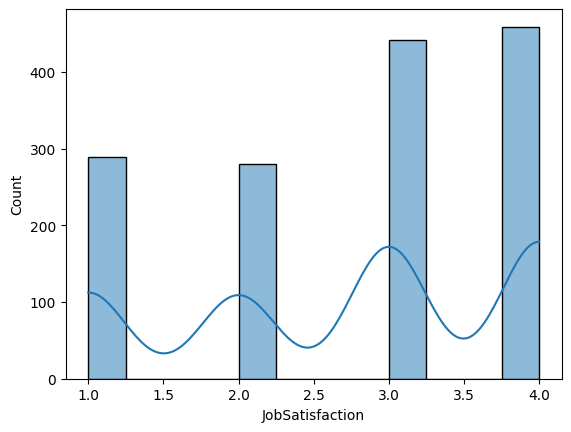

In [141]:
sns.histplot(data=df, x="JobSatisfaction",kde=True)

<Axes: xlabel='JobInvolvement', ylabel='Count'>

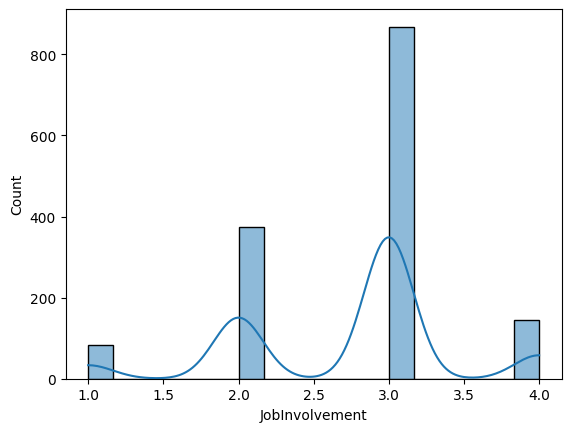

In [142]:
sns.histplot(data=df, x="JobInvolvement",kde=True)

In [167]:
def encontrar_outliers_iqr(df, coluna):
    Q1 = df[coluna].quantile(0.25)
    Q3 = df[coluna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    return df[(df[coluna] < limite_inferior) | (df[coluna] > limite_superior)]

In [144]:
outliers_idade = encontrar_outliers_iqr(df, 'Age')
print(outliers_idade[['Age']])

outliers_performance = encontrar_outliers_iqr(df, 'PerformanceRating')
print(outliers_performance[['PerformanceRating']])

Empty DataFrame
Columns: [Age]
Index: []
      PerformanceRating
1                     4
6                     4
7                     4
8                     4
21                    4
...                 ...
1441                  4
1445                  4
1446                  4
1447                  4
1467                  4

[226 rows x 1 columns]


<Axes: xlabel='PerformanceRating', ylabel='Count'>

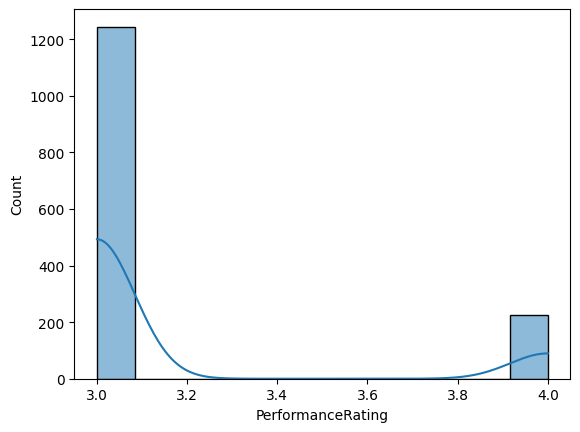

In [145]:
sns.histplot(data=df, x="PerformanceRating",kde=True)

## TREINAR MODELOS

In [146]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [147]:
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

In [148]:
cols_numericas = list(df.select_dtypes(include=['int64', 'float64']).columns)
cols_numericas.remove('Attrition')

cols_categoricas = [col for col in df.columns if col not in cols_numericas + ['Attrition']]

In [149]:
preprocess = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), cols_numericas),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cols_categoricas)
    ]
)

In [150]:
# Separar features e target
X = df.drop('Attrition', axis=1)
y = df['Attrition']

In [151]:
from sklearn.pipeline import Pipeline

# Criar pipelines
pipe_lr = Pipeline([
    ('preprocess', preprocess),
    ('model', LogisticRegression(max_iter=1000))
])

pipe_tree = Pipeline([
    ('preprocess', preprocess),
    ('model', DecisionTreeClassifier())
])

In [168]:
# Definir grids
param_grid_lr = {
    'model__C': [0.01, 0.1, 1, 10],
    'model__solver': ['liblinear', 'lbfgs'] }

param_grid_tree = {
    'model__max_depth': [3, 5, 10, None],
    'model__min_samples_split': [2, 5, 10] }

In [ ]:
grid_lr = GridSearchCV(pipe_lr, param_grid_lr, cv=5, scoring='f1')
grid_lr.fit(X_train, y_train)

grid_tree = GridSearchCV(pipe_tree, param_grid_tree, cv=5, scoring='f1')
grid_tree.fit(X_train, y_train)



----- Regressão Logística -----

Melhores parâmetros: {'model__C': 0.01, 'model__solver': 'liblinear'}
Acurácia: 0.8605442176870748
              precision    recall  f1-score   support

          No       0.86      1.00      0.92       247
         Yes       1.00      0.13      0.23        47

    accuracy                           0.86       294
   macro avg       0.93      0.56      0.57       294
weighted avg       0.88      0.86      0.81       294



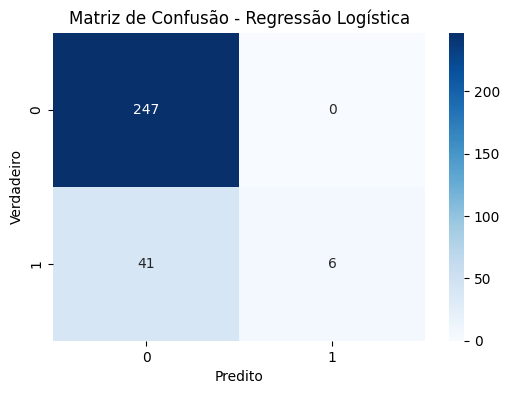

In [154]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Regressão Logística
y_pred_lr = grid_lr.predict(X_test)
print('\n\n----- Regressão Logística -----\n')
print('Melhores parâmetros:', grid_lr.best_params_)
print('Acurácia:', accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(6,4))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão - Regressão Logística')
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.show()



----- Árvore de Decisão -----

Melhores parâmetros: {'model__max_depth': 3, 'model__min_samples_split': 2}
Acurácia: 0.8333333333333334
              precision    recall  f1-score   support

          No       0.86      0.95      0.91       247
         Yes       0.45      0.21      0.29        47

    accuracy                           0.83       294
   macro avg       0.66      0.58      0.60       294
weighted avg       0.80      0.83      0.81       294



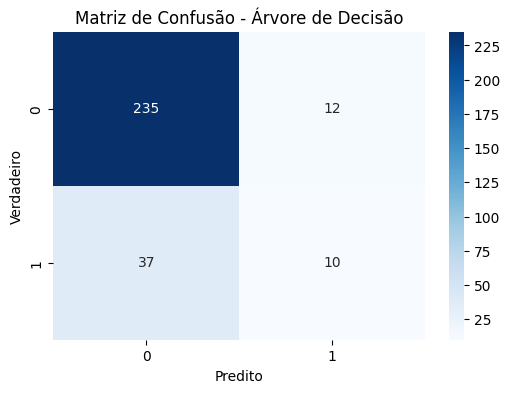

In [155]:
# Árvore de Decisão
y_pred_tree = grid_tree.predict(X_test)
print('\n\n----- Árvore de Decisão -----\n')
print('Melhores parâmetros:', grid_tree.best_params_)
print('Acurácia:', accuracy_score(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))

cm_tree = confusion_matrix(y_test, y_pred_tree)
plt.figure(figsize=(6,4))
sns.heatmap(cm_tree, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão - Árvore de Decisão')
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.show()

## Avaliação detalhada dos Modelos

In [156]:
# extrair falso negativo e falso positivo

def erros_da_matriz(cm):
    tn, fp, fn, tp = cm.ravel()
    return fp, fn

### Regressão logistica

In [157]:
cm_lr = confusion_matrix(y_test, y_pred_lr)
fp_lr, fn_lr = erros_da_matriz(cm_lr)
print(f"Regressão Logística - Falsos Positivos: {fp_lr}, Falsos Negativos: {fn_lr}")
print("""
Impacto no negócio:
- Falsos negativos: colaboradores que saem e não foram previstos, risco de perda sem aviso.
- Falsos positivos: colaboradores previstos para sair que não saem, custo desnecessário de retenção.
""")

Regressão Logística - Falsos Positivos: 0, Falsos Negativos: 41

Impacto no negócio:
- Falsos negativos: colaboradores que saem e não foram previstos, risco de perda sem aviso.
- Falsos positivos: colaboradores previstos para sair que não saem, custo desnecessário de retenção.



In [158]:
# Importância das variáveis

preprocess_fit = grid_lr.best_estimator_.named_steps['preprocess']

coef_lr = grid_lr.best_estimator_.named_steps['model'].coef_[0]

In [159]:
nomes_num = list(cols_numericas)
nomes_cat = preprocess_fit.named_transformers_['cat'].get_feature_names_out(cols_categoricas)
nomes_features = nomes_num + list(nomes_cat)

In [160]:
indices_lr = np.argsort(np.abs(coef_lr))[::-1]

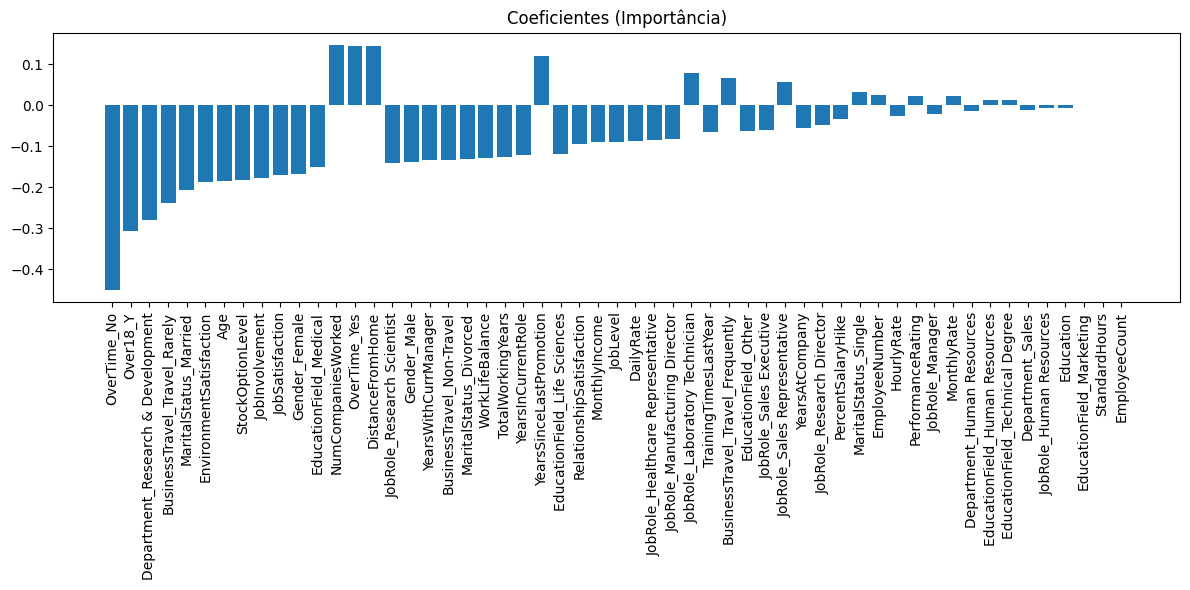

In [161]:
plt.figure(figsize=(12,6))
plt.bar(range(len(coef_lr)), coef_lr[indices_lr])
plt.xticks(range(len(coef_lr)), np.array(nomes_features)[indices_lr], rotation=90)
plt.title("Coeficientes (Importância)")
plt.tight_layout()
plt.show()

### Dados do modelo de Regressão Logística:

**Menos propensão a sair:**
- funcionários que não fazem hora extra
- funcionários de Pesquisa de Departamento (Department_Research ) e Desenvolvimento (Development)

- Funcionários +18, porém como todos são +18 na empresa isso não conta muito


**Maior propensão a sair:**
- funcionários que trabalharam anteriormente em mais empresas, perfil mais "móvel"
- funcionários que fazem hora extra (provavel mais cansaço e desgaste)
- que moram mais longe do trabalho (deslocamento)
- funcionários que não são promovitos a muito tempo (falta de reconhecimento)

### Árvore de Decisão

In [162]:
cm_tree = confusion_matrix(y_test, y_pred_tree)
fp_tree, fn_tree = erros_da_matriz(cm_tree)
print(f"Árvore de Decisão - Falsos Positivos: {fp_tree}, Falsos Negativos: {fn_tree}")
print("""\nImpacto no negócio:
- Falsos negativos: colaboradores que saem e não foram previstos, risco de perda sem aviso.
- Falsos positivos: colaboradores previstos para sair que não saem, custo desnecessário de retenção.""")

Árvore de Decisão - Falsos Positivos: 12, Falsos Negativos: 37

Impacto no negócio:
- Falsos negativos: colaboradores que saem e não foram previstos, risco de perda sem aviso.
- Falsos positivos: colaboradores previstos para sair que não saem, custo desnecessário de retenção.


In [163]:
preprocess_fit_tree = grid_tree.best_estimator_.named_steps['preprocess']

importancias_tree = grid_tree.best_estimator_.named_steps['model'].feature_importances_

In [164]:
nomes_num = list(cols_numericas)
nomes_cat = preprocess_fit_tree.named_transformers_['cat'].get_feature_names_out(cols_categoricas)
nomes_features = nomes_num + list(nomes_cat)

In [165]:
indices_tree = np.argsort(importancias_tree)[::-1]

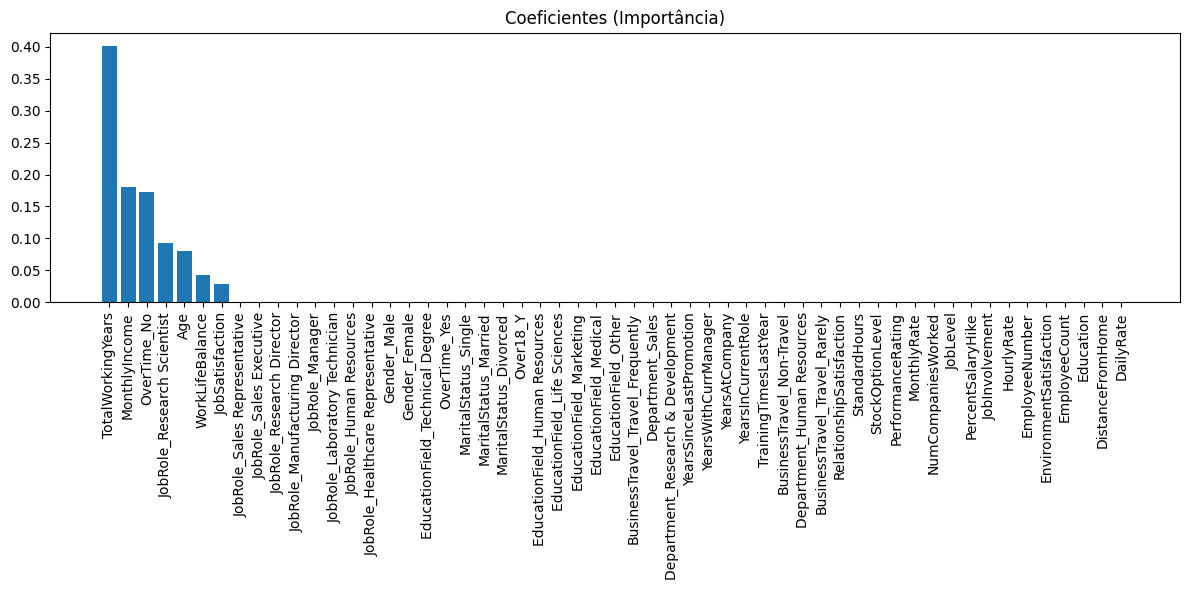

In [166]:
plt.figure(figsize=(12,6))
plt.bar(range(len(importancias_tree)), importancias_tree[indices_tree])
plt.xticks(range(len(importancias_tree)), np.array(nomes_features)[indices_tree], rotation=90)
plt.title("Coeficientes (Importância)")
plt.tight_layout()
plt.show()

### Maior influência na rotatividade do modelo Árvore de Decisão:

- **Total de anos trabalhados** (TotalWorkingYears) — maior peso na saída

- **Salário mensal** (MonthlyIncome) — funcionários com salário menor tendem a sair mais

- **Funcionários que fazem hora extra** (OverTime-Yes) — desgaste maior aumenta risco **(bate com o outro modelo)**

- **Cargo específico: Cientista de Pesquisa** (JobRole_Research Scientist) — perfil com rotatividade maior



Age, WorkLifeBalance e MonthlyRate influenciam mas bem pouco
